### Aula 03

In [ ]:
!pip install wooldridge
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wooldridge as woo
import statsmodels.api as sm

In [ ]:
wage1 = woo.dataWoo('wage1')
wage1.head()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


In [ ]:
wage1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      526 non-null    float64
 1   educ      526 non-null    int64  
 2   exper     526 non-null    int64  
 3   tenure    526 non-null    int64  
 4   nonwhite  526 non-null    int64  
 5   female    526 non-null    int64  
 6   married   526 non-null    int64  
 7   numdep    526 non-null    int64  
 8   smsa      526 non-null    int64  
 9   northcen  526 non-null    int64  
 10  south     526 non-null    int64  
 11  west      526 non-null    int64  
 12  construc  526 non-null    int64  
 13  ndurman   526 non-null    int64  
 14  trcommpu  526 non-null    int64  
 15  trade     526 non-null    int64  
 16  services  526 non-null    int64  
 17  profserv  526 non-null    int64  
 18  profocc   526 non-null    int64  
 19  clerocc   526 non-null    int64  
 20  servocc   526 non-null    int64 

* wage average hourly earnings
* educ years of education
* exper years potential experience
* tenure years with current employer
* nonwhite =1 if nonwhite
* female =1 if female
* married =1 if married
* numdep number of dependents
* smsa =1 if live in SMSA
* northcen =1 if live in north central U.S
* south =1 if live in southern region
* west =1 if live in western region
* construc =1 if work in construc. indus.
* ndurman =1 if in nondur. manuf. indus.
* trcommpu =1 if in trans, commun, pub ut
* trade =1 if in wholesale or retail
* services =1 if in services indus.
* profserv =1 if in prof. serv. indus.
* profocc =1 if in profess. occupation
* clerocc =1 if in clerical occupation
* servocc =1 if in service occupation
* lwage log(wage)
* expersq exper^2
* tenursq tenure^2

### Vamos fazer a análise das variáveis 'wage' e 'educ'.

In [ ]:
wage1[['wage','educ']].describe()

,wage,educ
count,526.000000,526.000000
mean,5.896103,12.562738
std,3.693086,2.769022
min,0.530000,0.000000
25%,3.330000,12.000000
50%,4.650000,12.000000
75%,6.880000,14.000000
max,24.980000,18.000000


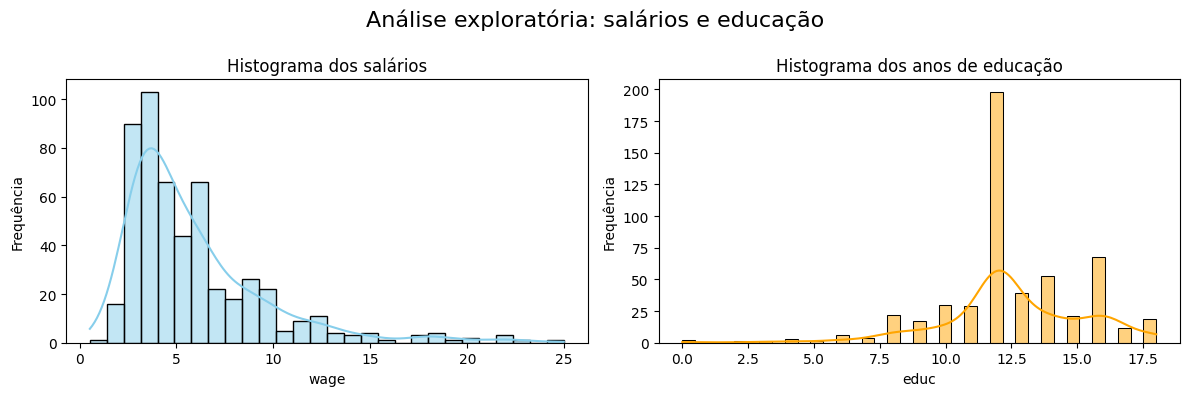

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12,4))
sns.histplot(wage1['wage'], kde=True, color='skyblue', ax = ax[0])
ax[0].set_ylabel('Frequência')
ax[0].set_title('Histograma dos salários')

sns.histplot(wage1['educ'], kde=True, color='orange', ax = ax[1])
ax[1].set_ylabel('Frequência')
ax[1].set_title('Histograma dos anos de educação')

plt.suptitle('Análise exploratória: salários e educação', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()


##### Boxplots



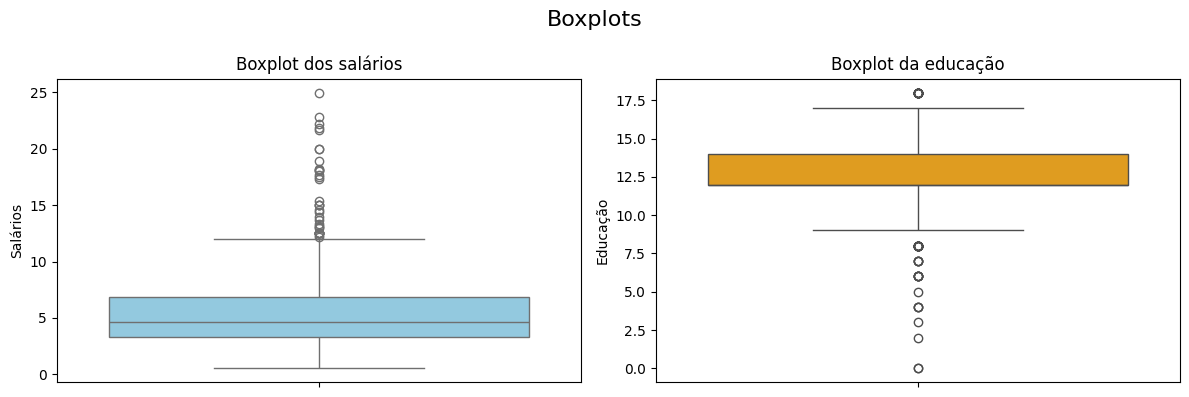

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (12,4))
sns.boxplot(wage1['wage'], color='skyblue', ax = ax[0])
ax[0].set_ylabel('Salários')
ax[0].set_title('Boxplot dos salários')

sns.boxplot(wage1['educ'], color='orange', ax = ax[1])
ax[1].set_ylabel('Educação')
ax[1].set_title('Boxplot da educação')

plt.suptitle('Boxplots', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

Vamos analisar a correlação

In [ ]:
correlation = wage1[['wage', 'educ']].corr()
print(correlation)

          wage      educ
wage  1.000000  0.405903
educ  0.405903  1.000000


In [ ]:
# modelo 1

X = sm.add_constant(wage1['educ'])
y = (wage1['wage'])

modelo = sm.OLS(y,X).fit()

print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     103.4
Date:                Mon, 04 Nov 2024   Prob (F-statistic):           2.78e-22
Time:                        21:50:09   Log-Likelihood:                -1385.7
No. Observations:                 526   AIC:                             2775.
Df Residuals:                     524   BIC:                             2784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9049      0.685     -1.321      0.1

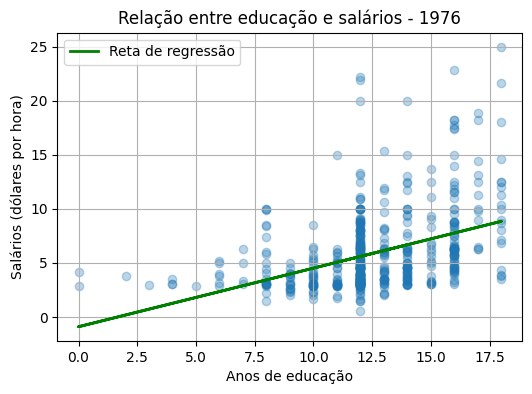

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(wage1['educ'], wage1['wage'],alpha=0.3)
plt.plot(wage1['educ'], modelo.predict(X), color='g', linewidth=2, label='Reta de regressão')
plt.xlabel('Anos de educação')
plt.ylabel('Salários (dólares por hora)')
plt.title('Relação entre educação e salários - 1976')
plt.autoscale()
plt.grid()
plt.legend()
plt.show()

##### O que são graus de liberdade?

Graus de Liberdade (GL) referem-se ao número de valores em um cálculo que são livres para variar após considerar as restrições impostas pelo modelo.

Por exemplo, suponha que temos a média de um conjunto $\{y_1,y_2,y_3\}$ igual a $4$, i.e. $\bar{y}=4$.
Portanto, se $y_1 = 1, y_2 = 3 $ e $\bar{y}=4$ logo $y_3$  terá de ser necessariamente igual à $8$. Portanto, se temos a média fixada, teremos no máximo $n-1$ valores que poderemos variar, pois o último é automaticamente fixado.

No contexto da regressão linear simples, os graus de liberdade são atribuídos de acordo com a quantidade de parâmetros que estamos estimando e o número total de observações.

###### Vamos relembrar que:
* $y_i = \beta_0 + \beta_1 x_i + \epsilon_i$ é o modelo populacional
* $\hat{y}_i = \hat{\beta_0} + \hat{\beta_1}x_i$ é o estimador de $E[Y|X]$

Temos como função de regressão amostral $y_i = \hat{y}_i + \hat{\epsilon}_i$ onde $\hat{\epsilon}_i$ são os resíduos.

Então, o número de graus de liberdade para o modelo é $DF_{model} = 1$, pois no modelo temos apenas um preditor: $educ$. No modelo de regressão geral temos $DF_{model} = p$, onde temos $p$ preditores.

Para os resíduos temos o número de graus de liberdade $DF_{Residuals} = n-2$, pois estimamos dois parâmetros $(\beta_0, \beta_1)$ e sobram $n-2$ graus de liberdade para modelar os resíduos.

Na regressão múltipla teremos $DF_{Residuals} = n-p-1$.

##### O que é o R-squared?

Podemos escrever a soma dos quadrados totais (SQT) como: $SQT = \sum_{i=1}^{n}(y_i - \bar{y})^2$

Daí, $SQT = \sum_{i=1}^{n}(y_i - \bar{y})^2 = \sum_{i=1}^{n}[(y_i - \hat{y}_i) + (\hat{y}_i - \bar{y})]^2  = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 + 2\sum_{i=1}^{n}(y_i - \hat{y}_i)(\hat{y}_i - \bar{y}) + \sum_{i=1}^{n}(\hat{y}_i - \bar{y})^2$

Usando as condições de primeira ordem do processo de otimização:
* $\sum_{i=1}^{n}[(y_i - \hat{y}_i) = \sum_{i=1}^{n}\hat{\epsilon}_i = 0$
* $\sum_{i=1}^{n}[(y_i - \hat{y}_i)x_i = \sum_{i=1}^{n}\hat{\epsilon}_i x_i = 0$

Obteremos que $2\sum_{i=1}^{n}(y_i - \hat{y}_i)(\hat{y}_i - \bar{y}) = 0$, logo: $$ \sum_{i=1}^{n}(y_i - \bar{y})^2 = \sum_{i=1}^{n}(\hat{y}_i - \bar{y})^2 + \sum_{i=1}^{n}(y_i - \hat{y}_i)^2$$

Em outras palavras: $SQT = SQE + SQR$

Fazendo $1 = \frac{SQE}{SQT} + \frac{SQR}{SQT}$ chegaremos a $$R^2 =  \frac{SQE}{SQT} = 1 - \frac{SQR}{SQT}$$



![image.png](attachment:ac92b3f8-8345-46aa-830a-df6358f1f36d.png)

O $R^2$ fornece uma medida quantitativa de quão bem o modelo de regressão se ajusta aos dados observados. Um $R^2$ mais alto geralmente indica um modelo que explica melhor a variabilidade dos dados.

* $0 \leq R^2 \leq 1$;
* Útil para comparar diferentes modelos;
* Quanto mais variáveis independentes adicionamos, maior o $R^2$;
* Sensível a outliers.

### Teorema de Gauss-Markov

##### Dadas as premissas do modelo clássico de regressão linear, os estimadores de mínimos quadrados da classe dos estimadores lineares não viesados têm variância mínima, isto é, são os melhores estimadores lineares não viesados.

Que hipóteses são essas?

1 - **Linearidade**. O modelo de regressão é linear: $Y = \beta_0 + \beta_1 X + \epsilon$

---

2 - **Erro com média 0**. O termo de erro $\epsilon$ agrega todas as variáveis que não foram explícitas no modelo.
* Podemos sempre fazer $E[\epsilon]=0$.

---

3 - **Erro sem relação com a variável independente**. Temos que o valor médio de $\epsilon$ não depende de $X$, em outras palavras: $$ E[\epsilon|X] = E[\epsilon] = 0.$$

Com isso, $E[Y|X] = \beta_0 + \beta_1 X$


Uma implicação direta é de que $$E[\epsilon| X]=0 \Longrightarrow Corr[\epsilon, X] = 0.$$

Sabemos que se duas variáveis são independentes $\Longrightarrow$ a correlação entre elas é $0$.

---

4 - **Homocedasticidade**. Variância constante de $\epsilon$ para qualquer $X$.
$$\begin{split}
Var[\epsilon| X] &= E[\epsilon - E(\epsilon|X)]^2\\
Var[\epsilon| X] &= E[\epsilon^2] = \sigma^2\\
\end{split}$$


![image.png](attachment:e69ad1bc-9306-48af-979a-1f866298c3d1.png)

![image.png](attachment:62f0c553-498d-4a1b-8fe8-b6cc6d2346a3.png)

---

5 - **Variação de X**. Valores amostrais de $X$, no caso são $\{x_1, x_2, \ldots, x_n\}$, não são todos iguais.

---

6 - **Ausência de autocorrelação**. Aqui queremos dizer que $E[\epsilon_i, \epsilon_j] = 0$ $\forall i \neq j$.

##### Caso as hipóteses do Teorema de Gauss Markov sejam violadas, não poderemos garantir que nossos estimadores lineares serão os melhores possíveis

Por exemplo, a heterocedasticidade implica em $Var[\epsilon_i | X_i] = \sigma_i^2$ e com isso o estimador $\hat{\beta}_1$ não será **eficiente**.

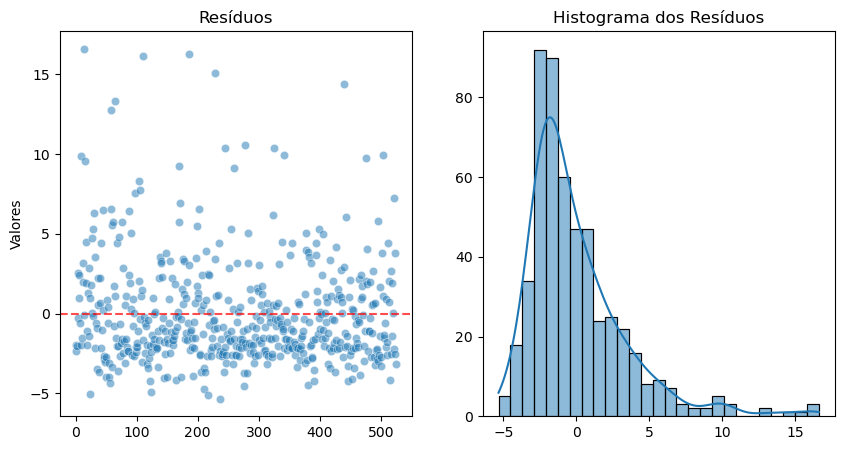

In [ ]:
#plotando os resíduos

residuals = wage1['wage'] - modelo.predict(X)
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].axhline(0, color='red', linestyle='--', alpha=0.7)
sns.scatterplot(residuals,alpha=0.5, ax=ax[0])
ax[0].set_title('Resíduos')
ax[0].set_ylabel('Valores')

sns.histplot(residuals, kde=True, ax=ax[1])
ax[1].set_title('Histograma dos Resíduos')
ax[1].set_ylabel('')
plt.show()


#### Hipótese adicional importante (não faz parte de Gauss-Markov):

$$\epsilon \sim N(0,\sigma^2)$$

1 - Vital para realizarmos inferência.

2 - Permite realizar estimativas por máxima verossimilhança.

---
Dadas as fórmulas dos estimadores
$$\begin{split}
\hat{\beta}_0 &= \bar{y} - \hat{\beta}_1 \bar{x}\\
\hat{\beta}_1 &= \frac{\sum_{i=1}^{n}(x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n}(x_i - \bar{x})}
\end{split}$$

podemos realizar manipulações algébricas e considerando $k_i = \frac{(x_i - \bar{x})}{\sum_{i=1}^{n}(x_i - \bar{x})^2}$ temos que o estimador $\hat{\beta}_1$ é escrito como uma combinação linear das observações da variável dependente $$\hat{\beta}_1 = \sum_{i=1}^{n} k_i y_i.$$

De forma semelhante, com $\alpha_i = (\frac{1}{n} - k_i \bar{x})$ temos $$\hat{\beta}_0 = \sum_{i=1}^{n}\alpha_i y_i$$

Como $y_i = \beta_0 + \beta_1 x_i + \epsilon_i$, podemos subistituir nas equações acima para obter $$ \hat{\beta_1} =\beta_1 + \sum_{i=1}^{n} k_i \epsilon_i.$$

Logo $E[\hat{\beta_1}] = \beta_1$ e o **estimador não possui viés**.

A variância deste estimador é $$Var[\hat{\beta}_1] = \frac{\sigma^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2}.$$

Agora, considerando $\epsilon_i \sim N(0,\sigma^2)$, teremos que $\hat{\beta}_1 \sim N\Big(\beta_1, \frac{\sigma^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2}\Big).$

PS: uma relação semelhante vale para $\hat{\beta}_0.$

![image.png](attachment:31473224-8d37-4a23-8410-ab404c22a697.png)

#### Testes de Hipótese nos parâmetros

In [ ]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     103.4
Date:                Mon, 28 Oct 2024   Prob (F-statistic):           2.78e-22
Time:                        18:59:05   Log-Likelihood:                -1385.7
No. Observations:                 526   AIC:                             2775.
Df Residuals:                     524   BIC:                             2784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9049      0.685     -1.321      0.1

Na última aula vimos que para o caso da média amostral $\overline{X}$ de uma amostra i.i.d. de distribuição normal com média $\mu<\infty$ e variância $\sigma^2$: $$\overline{X} \sim N(\mu, \sigma^2 / \sqrt{n}).$$

Pelo TCL $$Z = \frac{\overline{X}-\mu}{\sigma/ \sqrt{n}} \ \text{ com  } \  Z \sim N(0,1).$$

Vimos que podemos construir intervalos de confiança para a média com níveis de confiança pré estabelecidos (usamos o caso de $\alpha = 0.05$). Assim, $P(-z_{\alpha/2}<Z<+z_{\alpha/2})=1-\alpha$ e $P(-1.96<Z<+1.96)=0.95$. Usando o TCL: $$P(\overline{X}-1.96(\sigma/ \sqrt{n})< \mu< \overline{X}+1.96(\sigma/ \sqrt{n}))=0.95.$$ Portanto, nosso IC com nível $\alpha=0.05$ é $$IC = [\overline{X}-1.96(\sigma /\sqrt{n}), \overline{X}+1.96(\sigma/\sqrt{n})].$$

Agora, notemos que nossos parâmetros $\hat{\beta}_0$ e $\hat{\beta}_1$ seguem distribuição normal. Poderíamos construir ICs de forma $$[\hat{\beta}-t_{\alpha/2}\hat{\sigma}_{\hat{\beta}}, \hat{\beta}+t_{\alpha/2}\hat{\sigma}_{\hat{\beta}}].$$

##### O que é o $\hat{\sigma}_{\hat{\beta}}$? Por que aparece um $t_{\alpha/2}$?

Respostas:
* Prmeiro sobre o desvio padrão. Vamos focar no parâmetro $\beta_1$. Vimos que tem distribuição $$\hat{\beta}_1 \sim N\Big(\beta_1, \frac{\sigma^2}{\sum_{i=1}^{n}(x_i - \bar{x})^2}\Big).$$

Quase nunca sabemos o valor de $\sigma$ populacional, logo temos de usar a estimativa $\hat{\sigma}.$ Desta forma $$\hat{\sigma}_{\hat{\beta}} = \frac{\hat{\sigma}}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2}}.$$



* Por que usamos a letra $t_{\alpha/2}$?

Como nosso parâmetro $\hat{\beta}_1$ tem distribuição normal e é possível mostrar que $\hat{\sigma}^2$ segue uma distribuição qui-quadrado com $n-2$ graus de liberdade ($\chi_{n-2}^{2}$), teremos que $$ \frac{\hat{\beta}_1 - \beta_1}{\frac{\hat{\sigma}}{\sqrt{\sum_{i=1}^{n}(x_i - \bar{x})^2}}} \sim t_{n-2}$$

Neste caso, devemos usar a distribuição **t-student** com $n-2$ graus de liberdade!

**Dado tudo isso, vamos concluir com os testes de hipóteses dos coeficientes e p-valores**

Vamos focar no contexto de regressão e seu output.

Vamos testar duas hipóteses: $$\begin{split} H_0: \beta_1 &= \beta_1^{*} \\
H_1: \beta_1 &\neq \beta_1^{*} \\\end{split}.$$

Considerando os valores amostrais de $\hat{\sigma}_{\hat{\beta}_1}$ e consultando uma tabela t-student de $n-2$ graus de liberdade e nível de significância $\alpha$ obtemos um IC de forma que $$P(\beta_1^{*} - t_{\alpha/2}\hat{\sigma}_{\hat{\beta}_1}<\hat{\beta}_1 < \beta_1^{*} + t_{\alpha/2}\hat{\sigma}_{\hat{\beta}_1}) = 1-\alpha. $$

Se o parâmetro que calculamos, nosso $\hat{\beta}_1$, cai dentro do intervalo de confiança obtido acima, então **não rejeitamos a hipótese nula** com uma confiança de $(1-\alpha) \%$



**Caso prático**

No nosso caso vamos obter o valor $t_{0.025}$ com $524$ graus de liberdade.

Suponhamos que $$\begin{split} H_0: \beta_1 &= 0 \\
H_1: \beta_1 &\neq 0 \\\end{split}.$$

In [ ]:
# erros padrão dos estimadores
modelo.bse

const    0.684968
educ     0.053248
dtype: float64

In [ ]:
ep = modelo.bse[1]

C:\Users\hugos\AppData\Local\Temp\ipykernel_15492\2191216581.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ep = modelo.bse[1]


In [ ]:
from scipy.stats import t

alpha = 0.05
gl = 524
t_ = t.ppf(1 - alpha / 2, df=gl)

li = 0-t_*ep
ls = 0+t_*ep

print(f'Os intervalos do IC são {li} e {ls}.' )

Os intervalos do IC são -0.10460584904130889 e 0.10460584904130889.


**Abordagem do p-valor**

Fixamos a hipótese nula ( ou seja, supomos que $\beta_1 = \beta_1^{*}$). Calculamos a estatística $$ T = \frac{\hat{\beta}_1 - \beta_1^{*}}{\hat{\sigma}_{\hat{\beta}_1}}.$$

No exemplo (com $\beta_1^{*}=0)$ teremos $T = \frac{0.5414}{0.053} = 10.21$.

Com esse valor podemos obter $P(t>T) + P(t<-T)$ e este é o p-valor.

**p-valor: Probabilidade exata de cometer o erro de tipo I.**

Em Estatística, um erro do tipo I consiste em, num testes de hipóteses, rejeitar a hipótese nula quando ela é verdadeira e absoluta.


No nosso exemplo, p-valor = $0$ e podemos rejeitar a hipótese nula.

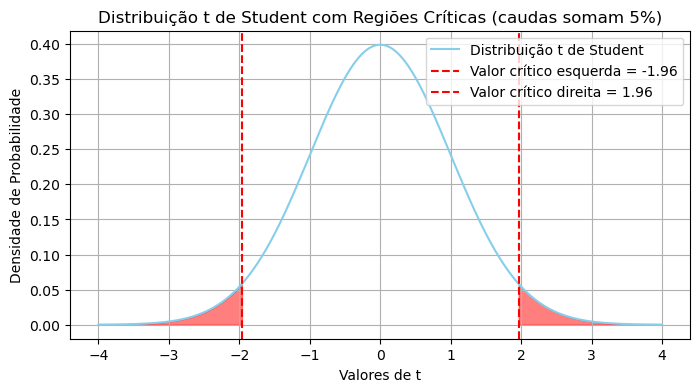

In [ ]:
# Calcular os valores críticos

# Gerar valores para a curva t-Student
x = np.linspace(-4, 4, 1000)
y = t.pdf(x, df=gl)

# Plotar a curva da distribuição t
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='Distribuição t de Student', color='skyblue')

# Destacar as áreas das caudas
x_esquerda = np.linspace(-4, -t_, 500)
x_direita = np.linspace(t_, 4, 500)

plt.fill_between(x_esquerda, t.pdf(x_esquerda, df=gl), color='red', alpha=0.5)#, label=f'Rejeição H0 (Esquerda) p < {alpha/2}')
plt.fill_between(x_direita, t.pdf(x_direita, df=gl), color='red', alpha=0.5),# label=f'Rejeição H0 (Direita) p < {alpha/2}')

# Adicionar anotações e linhas dos valores críticos
plt.axvline(-t_, color='red', linestyle='--', label=f'Valor crítico esquerda = {-t_:.2f}')
plt.axvline(t_, color='red', linestyle='--', label=f'Valor crítico direita = {t_:.2f}')

# Configurar o gráfico
plt.title('Distribuição t de Student com Regiões Críticas (caudas somam 5%)')
plt.xlabel('Valores de t')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)
plt.show()